In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

# machine learning
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
# from xgboost.sklearn import XGBClassifier

# vis param
import warnings
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [2]:
train_df, test_df = pd.read_csv('./input/train', sep='\t'), pd.read_csv('./input/test', sep='\t')
combine_df = [train_df, test_df]

## Describing data

In [3]:
train_df.columns.values
print()
train_df.info()
print()
test_df.info()

array(['#viewed_ads', '#times_visited_website', '#products_in_cart',
       'target_product_price', 'hour', 'target_product_category', 'age',
       'shopper_segment', 'delivery_time', 'tag'], dtype=object)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
#viewed_ads                79237 non-null float64
#times_visited_website     80000 non-null int64
#products_in_cart          80000 non-null int64
target_product_price       80000 non-null int64
hour                       80000 non-null int64
target_product_category    80000 non-null object
age                        79217 non-null float64
shopper_segment            80000 non-null object
delivery_time              80000 non-null object
tag                        80000 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 6.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
#viewed_ads                19767 non-null float64
#times_visited_website     20000 non-null int64
#products_in_cart          20000 non-null int64
target_product_price       20000 non-null int64
hour                       20000 non-n

In [4]:
train_df.head()
print()
test_df.head()

,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,hour,target_product_category,age,shopper_segment,delivery_time,tag
0,16.0,7,8,89,17,gardening,54.0,heavy shopper,1-3 days,0
1,10.0,6,6,35,23,video games,35.0,heavy shopper,1-3 days,1
2,9.0,7,6,48,2,clothing,39.0,new,4-8 days,0
3,11.0,6,6,48,8,clothing,36.0,casual,4-8 days,0
4,8.0,4,8,51,7,clothing,40.0,heavy shopper,9-14 days,0


,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,hour,target_product_category,age,shopper_segment,delivery_time
0,7.0,5,9,48,17,opera tickets,41.0,new,1-3 days
1,11.0,4,8,121,6,gardening,35.0,heavy shopper,4-8 days
2,10.0,4,4,44,10,opera tickets,35.0,heavy shopper,1-3 days
3,11.0,4,7,118,4,gardening,36.0,casual,9-14 days
4,9.0,4,4,35,6,video games,33.0,heavy shopper,4-8 days


In [5]:
train_df.describe()
train_df.describe(include=np.object)

,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,hour,age,tag
count,79237.000000,80000.000000,80000.000000,80000.000000,80000.000000,79217.000000,80000.000000
mean,10.001388,5.004963,6.498737,115.041050,11.457400,33.782951,0.212625
std,2.228882,1.582623,1.794774,120.099962,6.942047,6.708172,0.409167
min,0.000000,0.000000,0.000000,20.000000,0.000000,19.000000,0.000000
25%,8.000000,4.000000,5.000000,41.000000,5.000000,29.000000,0.000000
50%,10.000000,5.000000,7.000000,51.000000,11.000000,34.000000,0.000000
75%,12.000000,6.000000,8.000000,106.000000,18.000000,38.000000,0.000000
max,18.000000,10.000000,13.000000,495.000000,23.000000,63.000000,1.000000


,target_product_category,shopper_segment,delivery_time
count,80000,80000,80000
unique,5,3,4
top,video games,heavy shopper,4-8 days
freq,16217,26929,29638



#### Conclusions:
Complete age and #viewed_ads ? 


categorial = ['target_product_category', 'shopper_segment', 'delivery_time']

discrete = ['#viewed_ads', '#times_visited_website', '#products_in_cart', 'hour', 'age']


In [6]:
categorial = ['target_product_category', 'shopper_segment', 'delivery_time']
discrete = ['#viewed_ads', '#times_visited_website', '#products_in_cart', 'hour', 'age']

## Pivoting categorial data

In [7]:
for col in categorial:
    train_df[[col, 'tag']].groupby([col]).mean()

,tag
target_product_category,
clothing,0.261375
gardening,0.040932
opera tickets,0.115196
smartphones,0.225869
video games,0.414997


,tag
shopper_segment,
casual,0.139376
heavy shopper,0.358461
new,0.137864


,tag
delivery_time,
1-3 days,0.242541
15+ days,0.208914
4-8 days,0.216378
9-14 days,0.177404


Observations:
1. only ~4% of gardening sold vs more than 40%  of video games - maybe correlated to age?
2. heavy shoppers indeed buying 3 times of casual\new
3. delivery time alone doesn't effect the tag

## Visualizing data

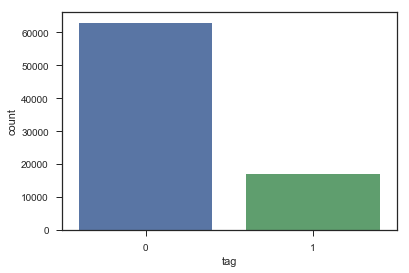

In [8]:
sns.countplot(train_df['tag'])

**The data is highly imbalanced**, so we need to deal with it when analyzing, modeling and evaluating the data

#viewed_ads


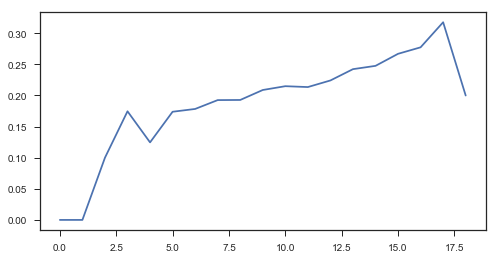

#times_visited_website


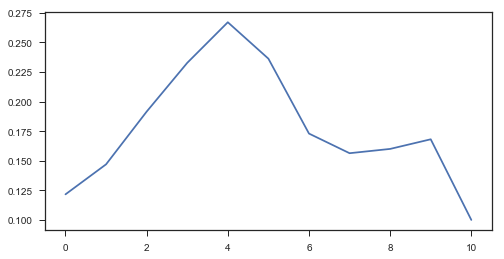

#products_in_cart


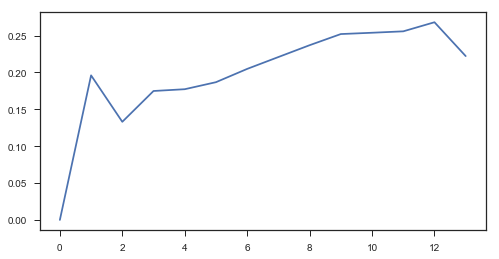

hour


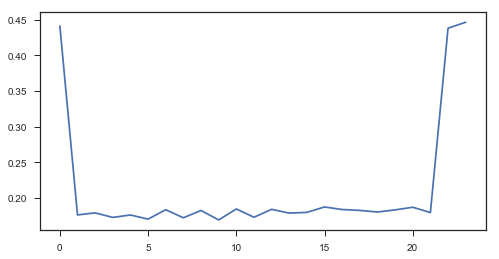

age


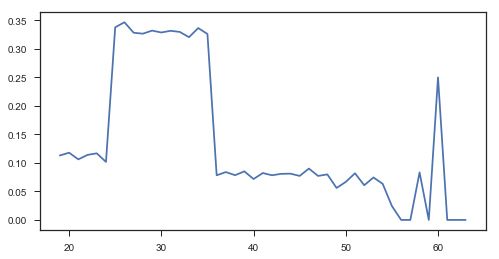

In [9]:
# visualize people that bought items
for col in discrete:
    print(col)
    _ = plt.figure(figsize=(8,4))
    _ = plt.plot(train_df[[col, 'tag']].groupby([col]).mean())
    plt.show()

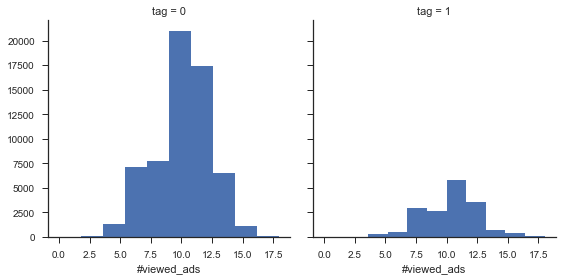

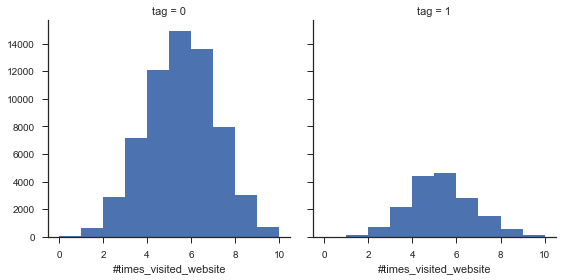

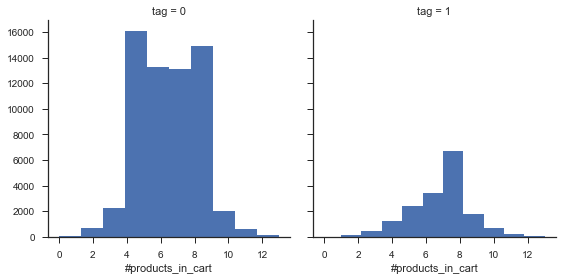

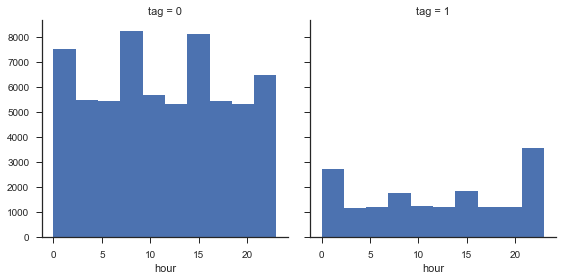

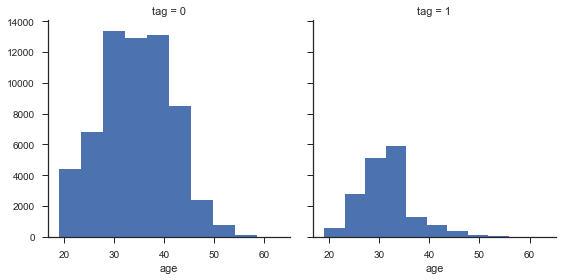

In [10]:
# compare hists of buying\not-buying
for col in discrete:
    g = sns.FacetGrid(train_df, col='tag', size=4)
    _ = g.map(plt.hist, col)

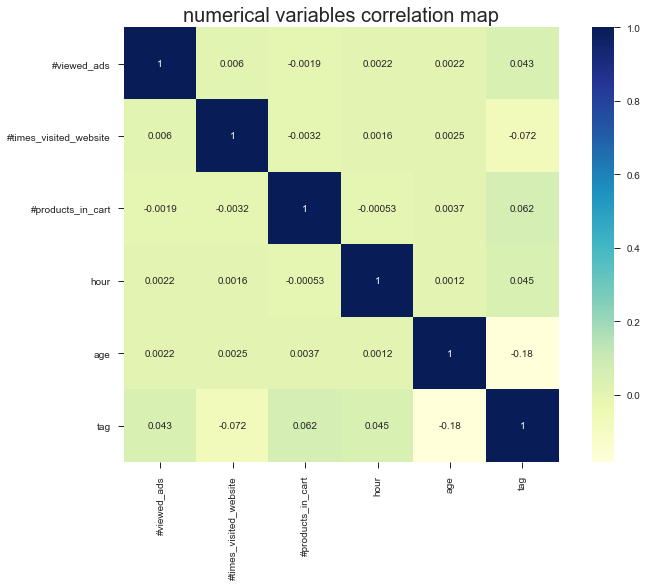

In [11]:
# multivariate analysis - remember the data is highly imbalanced
num_col = train_df[discrete+['tag']]
corrmat = num_col.corr(method='spearman')
_ = plt.figure(figsize=(12,8))
_ = sns.heatmap(corrmat, vmax=1., square=True, cmap='YlGnBu', annot=True)
_ = plt.title('numerical variables correlation map', fontsize=20)
plt.show()

Observations:
#viewed_ads, age and hour influencing the probability to buy an item
no significant correlation between features

## Preprocessing

In [12]:
# # complete missing data:
# for df in combine_df:
#     df.age.fillna(round(df.age.dropna().mean()), inplace=True) 

In [13]:
# change categotial to one-hot
for df in combine_df:
    onehot = pd.get_dummies(df[categorial], drop_first=True, dtype=np.int64)
    df.drop(categorial, axis=1, inplace=True)
    df[onehot.columns.values] = onehot

In [14]:
for df in combine_df:
    df.info()
    df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 16 columns):
#viewed_ads                              79237 non-null float64
#times_visited_website                   80000 non-null int64
#products_in_cart                        80000 non-null int64
target_product_price                     80000 non-null int64
hour                                     80000 non-null int64
age                                      79217 non-null float64
tag                                      80000 non-null int64
target_product_category_gardening        80000 non-null int64
target_product_category_opera tickets    80000 non-null int64
target_product_category_smartphones      80000 non-null int64
target_product_category_video games      80000 non-null int64
shopper_segment_heavy shopper            80000 non-null int64
shopper_segment_new                      80000 non-null int64
delivery_time_15+ days                   80000 non-null int64
delivery_time_4-8 d

,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,hour,age,tag,target_product_category_gardening,target_product_category_opera tickets,target_product_category_smartphones,target_product_category_video games,shopper_segment_heavy shopper,shopper_segment_new,delivery_time_15+ days,delivery_time_4-8 days,delivery_time_9-14 days
0,16.0,7,8,89,17,54.0,0,1,0,0,0,1,0,0,0,0
1,10.0,6,6,35,23,35.0,1,0,0,0,1,1,0,0,0,0
2,9.0,7,6,48,2,39.0,0,0,0,0,0,0,1,0,1,0
3,11.0,6,6,48,8,36.0,0,0,0,0,0,0,0,0,1,0
4,8.0,4,8,51,7,40.0,0,0,0,0,0,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
#viewed_ads                              19767 non-null float64
#times_visited_website                   20000 non-null int64
#products_in_cart                        20000 non-null int64
target_product_price                     20000 non-null int64
hour                                     20000 non-null int64
age                                      19786 non-null float64
target_product_category_gardening        20000 non-null int64
target_product_category_opera tickets    20000 non-null int64
target_product_category_smartphones      20000 non-null int64
target_product_category_video games      20000 non-null int64
shopper_segment_heavy shopper            20000 non-null int64
shopper_segment_new                      20000 non-null int64
delivery_time_15+ days                   20000 non-null int64
delivery_time_4-8 days                   20000 non-null int64
delivery_time_9-14 

,#viewed_ads,#times_visited_website,#products_in_cart,target_product_price,hour,age,target_product_category_gardening,target_product_category_opera tickets,target_product_category_smartphones,target_product_category_video games,shopper_segment_heavy shopper,shopper_segment_new,delivery_time_15+ days,delivery_time_4-8 days,delivery_time_9-14 days
0,7.0,5,9,48,17,41.0,0,1,0,0,0,1,0,0,0
1,11.0,4,8,121,6,35.0,1,0,0,0,1,0,0,1,0
2,10.0,4,4,44,10,35.0,0,1,0,0,1,0,0,0,0
3,11.0,4,7,118,4,36.0,1,0,0,0,0,0,0,0,1
4,9.0,4,4,35,6,33.0,0,0,0,1,1,0,0,1,0


## Split the data

In [15]:
y = train_df.tag
X = train_df.drop(['tag'], axis=1, inplace=False)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.2)

# check shape
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape : ', X_val.shape)
print('y_val shape : ', y_val.shape)


X_train shape:  (64000, 15)
y_train shape:  (64000,)
X_val shape :  (16000, 15)
y_val shape :  (16000,)


## Choose a model

In [29]:
n_sqrt = int(np.sqrt(X.shape[0]))
# param_grid = {
#       'nthread': [-1],
#       'n_estimators': [n_sqrt, 2*n_sqrt],
#       'learning_rate': [0.1, 0.3], 
#       'subsample': [0.5, 0.8, 1],
#       'colsample_bytree': [0.5, 0.8, 1],
#       'max_depth': [2,4,10], 
# #       'gamma': [x/10.0 for x in range(0,6,2)],
# #       'alpha': [1e-2, 1, 50]
#      } # missing search on lambda!

param_grid = {
      'nthread': [-1],
      'n_estimators': [n_sqrt],
#       'learning_rate': [0.01, 0.1, 0.3], 
      'subsample': [0.8, 1],
      'colsample_bytree': [0.8, 1],
      'max_depth': [4, 10], 
#       'gamma': [x/10.0 for x in range(0,6,2)],
#       'alpha': [1e-2, 1, 50]
     } 

clf = GridSearchCV(
    estimator=XGBClassifier(random_state=0),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs = -1
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
print("Classification report:")
print(classification_report(y_val, y_pred))

# nested CV option:
# scores = cross_val_score(
#   clf,
#   X,
#   y,
#   scoring = 'f1',
#   cv = 2
# )


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'nthread': [-1], 'n_estimators': [282], 'subsample': [0.8, 1], 'colsample_bytree': [0.8, 1], 'max_depth': [4, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

Classification report:
             precision    recall  f1-score   support

          0       0.97      0.99      0.98     12564
          1       0.95      0.90      0.92      3436

avg / total       0.97      0.97      0.97     16000



{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 282, 'nthread': -1, 'subsample': 1}


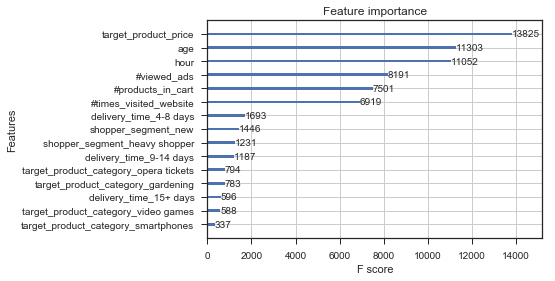

In [25]:
print(clf.best_params_)
plot_importance(clf.best_estimator_,importance_type='weight')
plt.show()

In [38]:
predictions = clf.predict(test_df)
np.savetxt('predictions.csv', predictions,  fmt='%d', header='predictions', comments='')

In [39]:
pred = pd.read_csv('predictions.csv')
pred

,predictions
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0
